In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [55]:
from sklearn import datasets
import scipy

In [56]:
iris = datasets.load_iris()

def knn(mask, point, k):
    diff = iris.data[mask] - point

    diff_squared = (diff**2)
    distances = dot(diff_squared, ones((len(iris.feature_names),1)))

    tops = numpy.argsort(distances[:,0])

    return scipy.stats.mode(iris.target[mask][tops[:k]]).mode

In [57]:
def knn_run(k):
    error_count = 0
    all_numbers = range(0, len(iris.target))
    learning_mask = random.choice(all_numbers, int(2 * len(iris.target) / 3), replace=False)
    testing_mask = set(all_numbers).difference(set(learning_mask))
    for x in testing_mask:
        predicted_list = knn(learning_mask, iris.data[x], k)
        predicted = random.choice(predicted_list)
        if predicted != iris.target[x]:
            error_count += 1
    return error_count    

In [58]:
data = []
xs = range(1,20,2)
for k in xs:
    test_count = 500
    errors = []
    for i in range(test_count):
        error_count = knn_run(k)
        errors.append(error_count * 100 / len(testing_mask))
    data.append(average(errors))


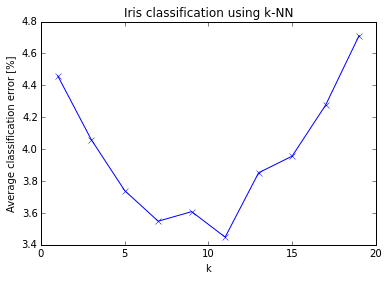

In [76]:
title("Iris classification using k-NN")
plot(asarray(xs), asarray(data), "x-")
ylabel("Average classification error [%]")
xlabel("k")
